In [4]:
import networkx as nx
import numpy as np
import random
import matplotlib.pyplot as plt

In [5]:
# 1a config model

def config_model(degseq):
    G = nx.Graph()
    # creating nodes to populate G with
    n = len(degseq)
    G.add_nodes_from(range(n)) 

    # creating a list of stubs to sample from instead of the nodes
    stubs = [node for node, degree in enumerate(degseq) for _ in range(degree)]

    # handle edge case of uneven deg seq
    if len(stubs) % 2 != 0:
        print("Error: Degree sequence must sum to an even number.")
        return None

    # shuffle list to randomize pairings
    random.shuffle(stubs)

    # pair each adjacent stub
    for i in range(0, len(stubs), 2):
        u = stubs[i]
        v = stubs[i+1]
        G.add_edge(u, v)
        
    return G

In [6]:
#1b chung lu

def chung_lu(degseq): 
    # same as before
    G = nx.Graph()
    ds_copy = list(degseq)
    N = len(ds_copy)
    G.add_nodes_from(range(N))

    for i in range(N):
        for j in range(i+1, N): # nested for loop to get all possible combos w/o visiting any twice
            ki = ds_copy[i]
            ji = ds_copy[j]
            pr = (ki*ji)/sum(ds_copy) # 2m = sum of degree sequence
            if random.random()< pr:
                G.add_edge(i, j)
    return G

In [9]:
# 1c model diff (setup)

degrees=[8,5,5,4,3,2,2,2,1,1,1,1,1,1,1]
# init lists to contain samples
config_graphs = []
cl_graphs = []

# collecting samples
for i in range(1000):
    G = config_model(degrees)
    config_graphs.append(G)

for i in range(1000):
    G = chung_lu(degrees)
    cl_graphs.append(G)

def avg_adj_matrix(sample): # function to calculate avg adjacency matrix
    n = len(degrees)
    sum_matrix = np.zeros((n, n)) # zero matrix to act as "running total"
    for g in sample:
        sum_matrix += nx.to_numpy_array(g) # convert to array and add to sum
    avg_matrix = sum_matrix / len(sample)
    return avg_matrix

config_avg_adj = avg_adj_matrix(config_graphs)
cl_avg_adj = avg_adj_matrix(cl_graphs)



In [ ]:
# 1c model diff (heatmap)
fig, ax = plt.subplots(1, 2, figsize=(12,6))

im1 = ax[0].imshow(config_avg_adj, cmap='viridis')
fig.colorbar(im1, ax=ax[0])
ax[0].set_title('default')

im2 = ax[1].imshow(cl_avg_adj, cmap='viridis')
fig.colorbar(im2, ax=ax[1])
ax[1].set_title('chung lu')

plt.tight_layout()

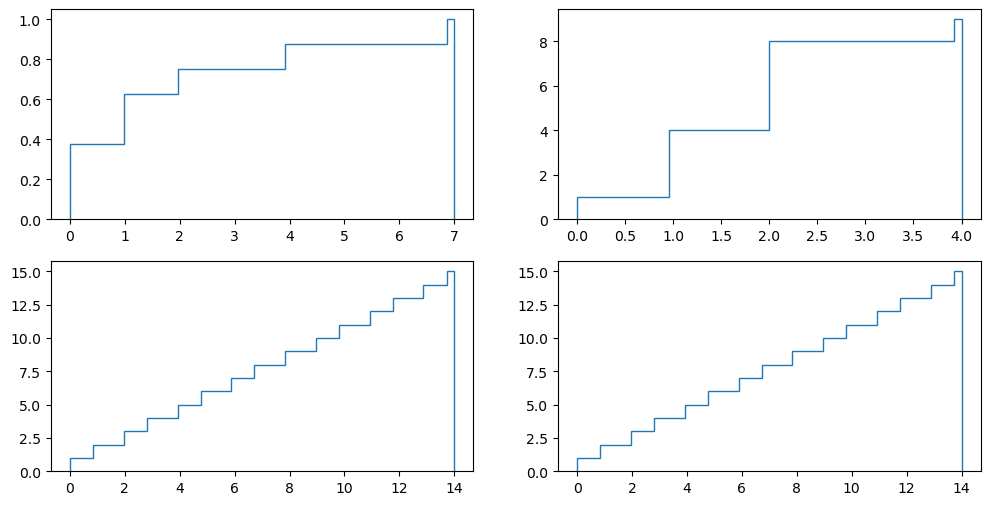

In [12]:
# 1c model diff part 2

# initial setup. creating graphs and collecting data
G_config = config_model(degrees)
G_chunglu = chung_lu(degrees)

config_degdist = nx.degree_histogram(G_config)
cl_degdist = nx.degree_histogram(G_chunglu)
config_cc = nx.clustering(G_config)
cl_cc = nx.clustering(G_chunglu)

# creating plots
fig, ax = plt.subplots(2, 2, figsize=(12,6))

# degree distribution on top row in cumulative distribution form
im1 = ax[0,0].hist(config_degdist, 
                            bins=50, 
                            cumulative=True, 
                            density=True, 
                            histtype='step')

im2 = ax[0,1].hist(cl_degdist,
                          bins=50,
                          cumulative=True,
                          histtype='step')

# clustering coefficient on bottom
im3 = ax[1,0].hist(config_cc,
                         bins=50,
                         cumulative=True,
                         histtype='step')

im4 = ax[1,1].hist(cl_cc,
                   bins=50,
                   cumulative=True,
                   histtype='step')


differences:
1. chung lu does not preserve exact deg dist (how close is approximate?)
2. edge probs are independent in chung lu
3. no multi edges/self loop in chung lu
4. default considers all possible incarnations of a network that satisfy its constraints as equally probable

metrics:
deg dist should be about same
cc diff
